In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
# We load Fake.csv and True.csv
fake_df = pd.read_csv('Fake.csv')
real_df = pd.read_csv('True.csv')
fake_df = fake_df[['title', 'text']]
real_df = real_df[['title', 'text']]
fake_df['class'] = 0
real_df['class'] = 1
df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  class  
0  Donald Trump just couldn t wish all Americans ...      0  
1  House Intelligence Committee Chairman Devin Nu...      0  
2  On Friday, it was revealed that former Milwauk...      0  
3  On Christmas day, Donald Trump announced that ...      0  
4  Pope Francis used his annual Christmas Day mes...      0

In [2]:
df['title_text'] = df['title'] + ' ' + df['text']
df.drop(['title', 'text'], axis=1, inplace=True)
df.head()

class                                         title_text
0      0   Donald Trump Sends Out Embarrassing New Year’...
1      0   Drunk Bragging Trump Staffer Started Russian ...
2      0   Sheriff David Clarke Becomes An Internet Joke...
3      0   Trump Is So Obsessed He Even Has Obama’s Name...
4      0   Pope Francis Just Called Out Donald Trump Dur...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       44898 non-null  int64 
 1   title_text  44898 non-null  object
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


<AxesSubplot:xlabel='class', ylabel='count'>

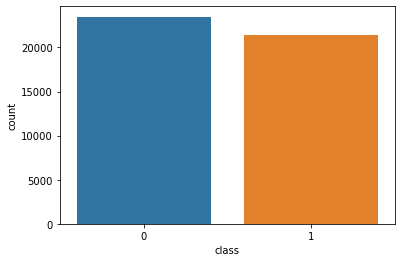

In [4]:
import seaborn as sns
sns.countplot(x="class", data = df)

In [ ]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import string 
from nltk.stem import WordNetLemmatizer
Tweet = []
Labels = []

for row in df["title_text"]:
    #tokenize words
    words = word_tokenize(row)
    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    #remove stop words
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c" ]
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Tweet.append(lemma_list)
X = df['title_text']
y = df['class']
# Extract Feature With CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))